## 6. Decision Trees and Ensemble Learning
This week, we'll talk about decision trees and tree-based ensemble algorithms.

### 6.1 Credit Risk Scoring Project
- **Dataset**: [CreditScoring Project Dataset](https://github.com/gastonstat/CreditScoring)
ring

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation
* Downloading the datase
* Re-encoding the categorical variables

Doing the train/validation/test split

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [5]:
df = pd.read_csv(data)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


##### Data Cleaning

In [7]:
df.columns = df.columns.str.lower()

In [8]:
list(df.columns)

['status',
 'seniority',
 'home',
 'time',
 'age',
 'marital',
 'records',
 'job',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

* **status**: whether the customer managed to pay back the loan (1) or not (2)
* **seniority**: job experience in years
* **home**: type of homeownership: renting (1), a homeowner (2), and others
* **time**: period planned for the loan (in months)
* **age**: age of the client
* **marital** [status]: single (1), married (2), and others
* **records**: whether the client has any previous records: no (1), yes (2) (It’s not
clear from the dataset description what kind of records we have in this column.
For the purposes of this project, we may assume that it’s about records in the
bank’s database.)
* **job**: type of job: full-time (1), part-time (2), and others
* **expenses**: how much the client spends per month
* **income**: how much the client earns per month
* **assets**: total worth of all the assets of the client
* **debt**: amount of credit debt
* **amount**: requested amount of the loan
* **price**: price of an item the client wants to buy

#### Fix Categorical mappings

In [11]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [12]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

In [13]:
df.status = df.status.map(status_values)

In [14]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [15]:
home_values = {
    1:'rent',
    2:'owner',
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk',
}

In [16]:
df.home = df.home.map(home_values)

In [17]:
df.home.value_counts()

home
owner      2107
rent        973
parents     783
other       319
private     247
ignore       20
unk           6
Name: count, dtype: int64

In [18]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

In [19]:
df.marital = df.marital.map(marital_values)

In [20]:
record_values = {
    1:'no',
    2:'yes',
    0:'unk',
}

In [21]:
df.records = df.records.map(record_values)

In [22]:
job_values = {
    1:'fixed',
    2:'parttime',
    3:'freelance',
    4:'others',
    0:'unk',
}

In [23]:
df.job = df.job.map(job_values)

In [24]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [25]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Suspicious values for max = 99999999 -> In some cases

In [27]:
df.max()

status            unk
seniority          48
home              unk
time               72
age                68
marital         widow
records           yes
job               unk
expenses          180
income       99999999
assets       99999999
debt         99999999
amount           5000
price           11140
dtype: object

In [28]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)

In [29]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [30]:
# review the status column

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [31]:
df = df[df.status != 'unk']

In [32]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

#### Data Preparation

- Split dataset into Train, Validation, Test
- Handle missing values
- Use onehot encoding to encode categorical values
- Create a feature matrix X and target variable y

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_train_full,df_test = train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val = train_test_split(df_train_full,test_size=0.25,random_state=11)

In [36]:
len(df_train),len(df_val),len(df_test)

(2672, 891, 891)

Outcome to predict - **status**

In [38]:
y_train = df_train.status.values
y_val = df_val.status.values

In [39]:
del df_train['status']
del df_val['status']

In [40]:
# Replace missing values with Zero 

df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

##### Encode Categorical variables  - OneHot encoding

In [42]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [43]:
from sklearn.feature_extraction import DictVectorizer

In [44]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(dict_val)

In [45]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=parttime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

## 6.3 Decision Trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree
tree

A *decision tree* is a data structure that encodes a series of if-then-else rules. Each node in a tree contains a condition. If the condition is satisfied, we go to the right side of the tree; otherwise, we go to the left. In the end we arrive at the final decision

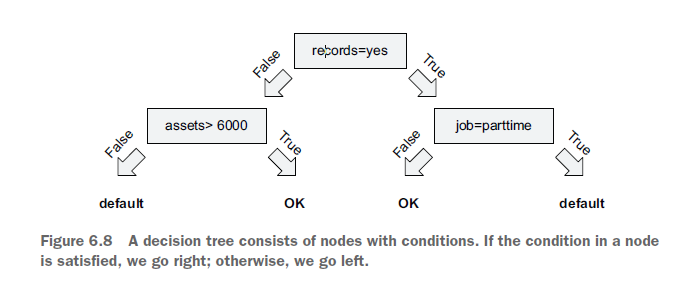

In [48]:
# Sample decision tree format in a function would be

def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'   
    

In [49]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [50]:
assess_risk(xi)

'ok'

##### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
auc

1.0

In [56]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.6588209295003754

We just observed a case of **overfitting**. The tree learned the training data so well that it simply memorized the outcome for each customer. However, when we applied it to
the validation set, the model failed. The rules it extracted from the data turned out to
be too specific to the training set, so it worked poorly for customers it didn’t see
during training. In such cases, we say that the model cannot **generalize**.

Overfitting happens when we have a __complex model with enough power to
remember all the training data__. If we force the model to be simpler, we can make it
less powerful and improve the model’s ability to generalize.

We have multiple ways to control the complexity of a tree. One option is to restrict
its size: we can specify the max_depth parameter, which controls the maximum number
of levels.

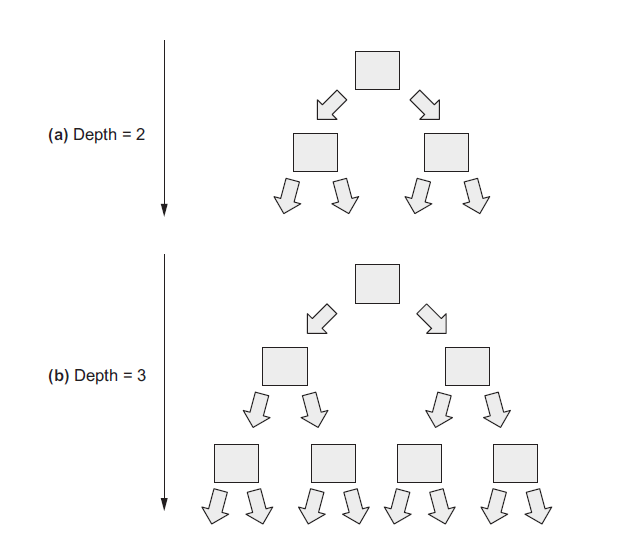

The default value for the `max_depth` parameter is None, which means that the tree can
grow as large as possible. We can try a smaller value and compare the results.

In [137]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

To visualize the tree

In [142]:
from sklearn.tree import export_text

tree_text = export_text(dt,feature_names=dv.get_feature_names_out())
print(tree_text)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: default
|   |--- seniority >  6.50
|   |   |--- class: ok
|--- records=no >  0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: ok
|   |--- job=parttime >  0.50
|   |   |--- class: default



In [150]:
y_pred_training = dt.predict_proba(X_train)[:,1]
auc_training = roc_auc_score(y_train,y_pred_training)
auc_training

0.7054989859726213

In [152]:
y_pred_val = dt.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val,y_pred_val)
auc_val

0.6685264343319368

##### Model Performance Analysis

Previously, the performance on the training set was 100%, but now it’s only 70.5%. This indicates that the model can no longer memorize all the outcomes from the training set.

However, the score on the validation set is better: it’s 66.9%, which is an improvement over the previous result (65%). By making the model less complex, we improved its ability to generalize. Now it’s better at predicting the outcomes for customers it hasn’t seen previously.
##

### The Problem of Simplicity

However, this tree has another problem — it’s too simple. To make it better, we need to tune the model: try different parameters, and see which ones lead to the best A##UC.

### Tuning Model Parameters

In addition to `max_depth`, we can control other parameters. To understand what these parameters mean and how they influence the model, let’s take a step back and look at how decision trees learn rules from data.
from data.

## 6.4 Decision Tree Learning Algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm


In [263]:
assets = [8000,2000,3000,0,6000,6000,9000]
statuses = ['default','OK','OK','OK','OK','default','default']

sample_data = list(zip(assets,statuses))
sample_data

[(8000, 'default'),
 (2000, 'OK'),
 (3000, 'OK'),
 (0, 'OK'),
 (6000, 'OK'),
 (6000, 'default'),
 (9000, 'default')]

In [265]:
df_sample = pd.DataFrame(sample_data,columns=['assets','status'])
df_sample.head(10)

,assets,status
0,8000,default
1,2000,OK
2,3000,OK
3,0,OK
4,6000,OK
5,6000,default
6,9000,default


In [267]:
df_sample.sort_values('assets')

,assets,status
3,0,OK
1,2000,OK
2,3000,OK
4,6000,OK
5,6000,default
0,8000,default
6,9000,default


In [269]:
from IPython.display import display

In [273]:
# gET thresholds - Unique assets except the last

Ts = [0,2000,3000,4000,5000]

for T in Ts:
    print(T)
    df_left = df_sample[df_sample.assets <= T] # Default
    df_right = df_sample[df_sample.assets > T] # OK

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    print('--------')
    print(df_right.status.value_counts(normalize=True))
    display(df_right)
    print()
    print()
    

0


,assets,status
3,0,OK


status
OK    1.0
Name: proportion, dtype: float64
--------
status
default    0.5
OK         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,OK
2,3000,OK
4,6000,OK
5,6000,default
6,9000,default




2000


,assets,status
1,2000,OK
3,0,OK


status
OK    1.0
Name: proportion, dtype: float64
--------
status
default    0.6
OK         0.4
Name: proportion, dtype: float64


,assets,status
0,8000,default
2,3000,OK
4,6000,OK
5,6000,default
6,9000,default




3000


,assets,status
1,2000,OK
2,3000,OK
3,0,OK


status
OK    1.0
Name: proportion, dtype: float64
--------
status
default    0.75
OK         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
4,6000,OK
5,6000,default
6,9000,default




4000


,assets,status
1,2000,OK
2,3000,OK
3,0,OK


status
OK    1.0
Name: proportion, dtype: float64
--------
status
default    0.75
OK         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
4,6000,OK
5,6000,default
6,9000,default




5000


,assets,status
1,2000,OK
2,3000,OK
3,0,OK


status
OK    1.0
Name: proportion, dtype: float64
--------
status
default    0.75
OK         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
4,6000,OK
5,6000,default
6,9000,default


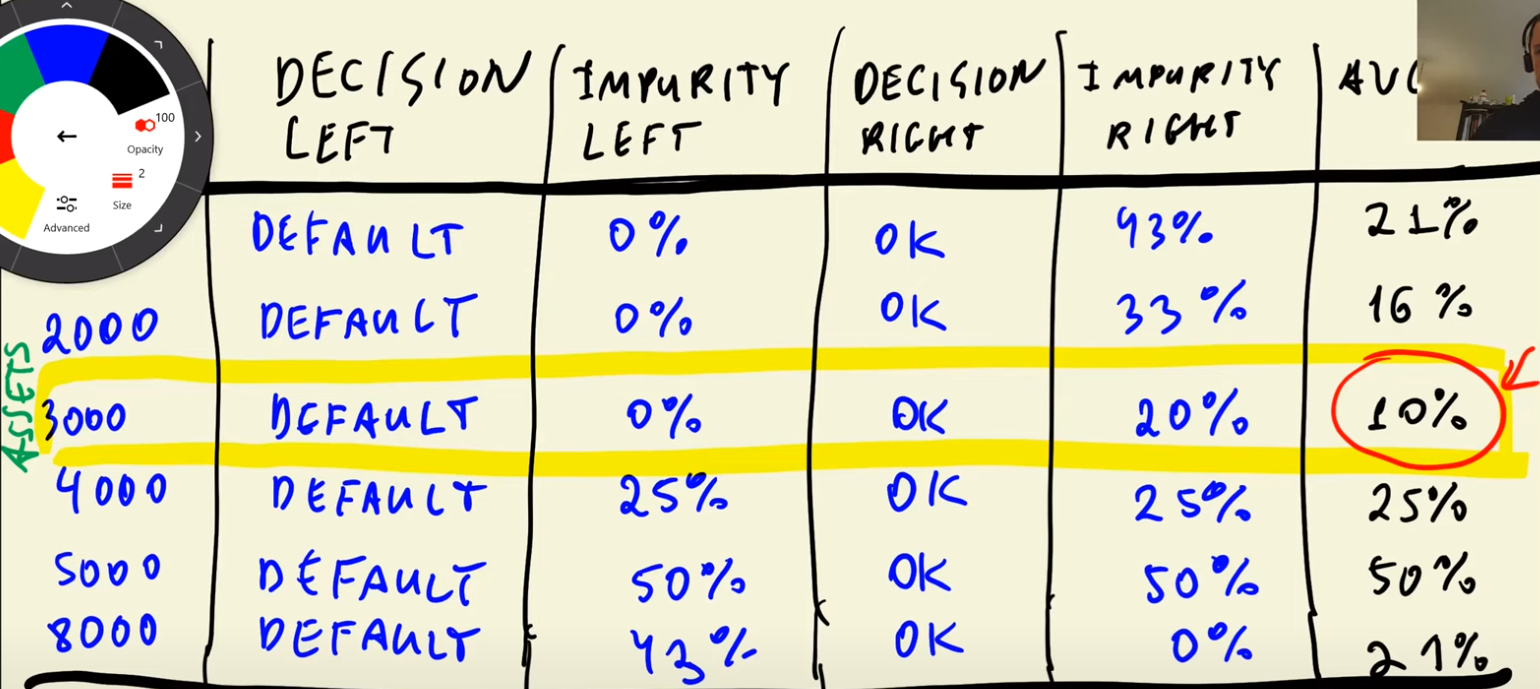

https://www.youtube.com/watch?v=XODz6LwKY7g&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=63&ab_channel=DataTalksClub%E2%AC%9B

## 6.5 Decision Trees Parameter Tuning
- Selecting `max_depth`
- Selecting `min_samples_leaf`


In [277]:
sample_depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

In [289]:
for d in sample_depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f'{d} --> {auc.round(3)}')

1 --> 0.606
2 --> 0.669
3 --> 0.739
4 --> 0.761
5 --> 0.767
6 --> 0.757
10 --> 0.674
15 --> 0.665
20 --> 0.642
None --> 0.654


In [296]:
sample_min_leaf = [1, 5, 10, 15, 20, 50, 100, 200,500]

In [306]:
scores = []
for m in [4,5,6]:
    print('depth: %s' % m)

    for s in sample_min_leaf:
        dt = DecisionTreeClassifier(max_depth=m,min_samples_leaf=s)
        dt.fit(X_train,y_train)
    
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        print('%s -> %.3f' % (s, auc))
        scores.append((m,s,auc))
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747
500 -> 0.680

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.767
100 -> 0.763
200 -> 0.759
500 -> 0.680

depth: 6
1 -> 0.745
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768
500 -> 0.680



In [314]:
df_scores = pd.DataFrame(scores,columns=['depth','samples_leaf','auc'])
df_scores.head()

,depth,samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


In [316]:
df_scores.sort_values('auc',ascending=False).head()

,depth,samples_leaf,auc
21,6,15,0.785319
20,6,10,0.778299
24,6,100,0.776434
22,6,20,0.773634
13,5,20,0.773537


In [320]:
df_scores_pivot = df_scores.pivot(index='samples_leaf',columns=['depth'],values=['auc'])
df_scores_pivot

auc                    
depth                4         5         6
samples_leaf                              
1             0.761283  0.766938  0.744708
5             0.761283  0.767755  0.761658
10            0.761283  0.762276  0.778299
15            0.763726  0.772142  0.785319
20            0.760910  0.773537  0.773634
50            0.753457  0.766753  0.770289
100           0.755937  0.763384  0.776434
200           0.747260  0.759073  0.768267
500           0.679842  0.679842  0.679842

<Axes: xlabel='None-depth', ylabel='samples_leaf'>

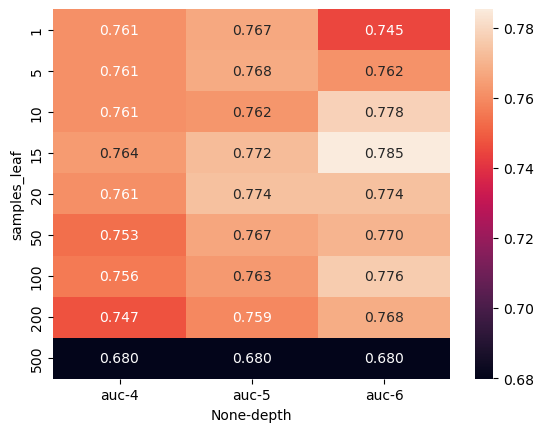

In [328]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [330]:
# After all this, go with the final decision tree
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and Random Forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

This way of putting together multiple decision trees into an ensemble is called a **random forest**t.

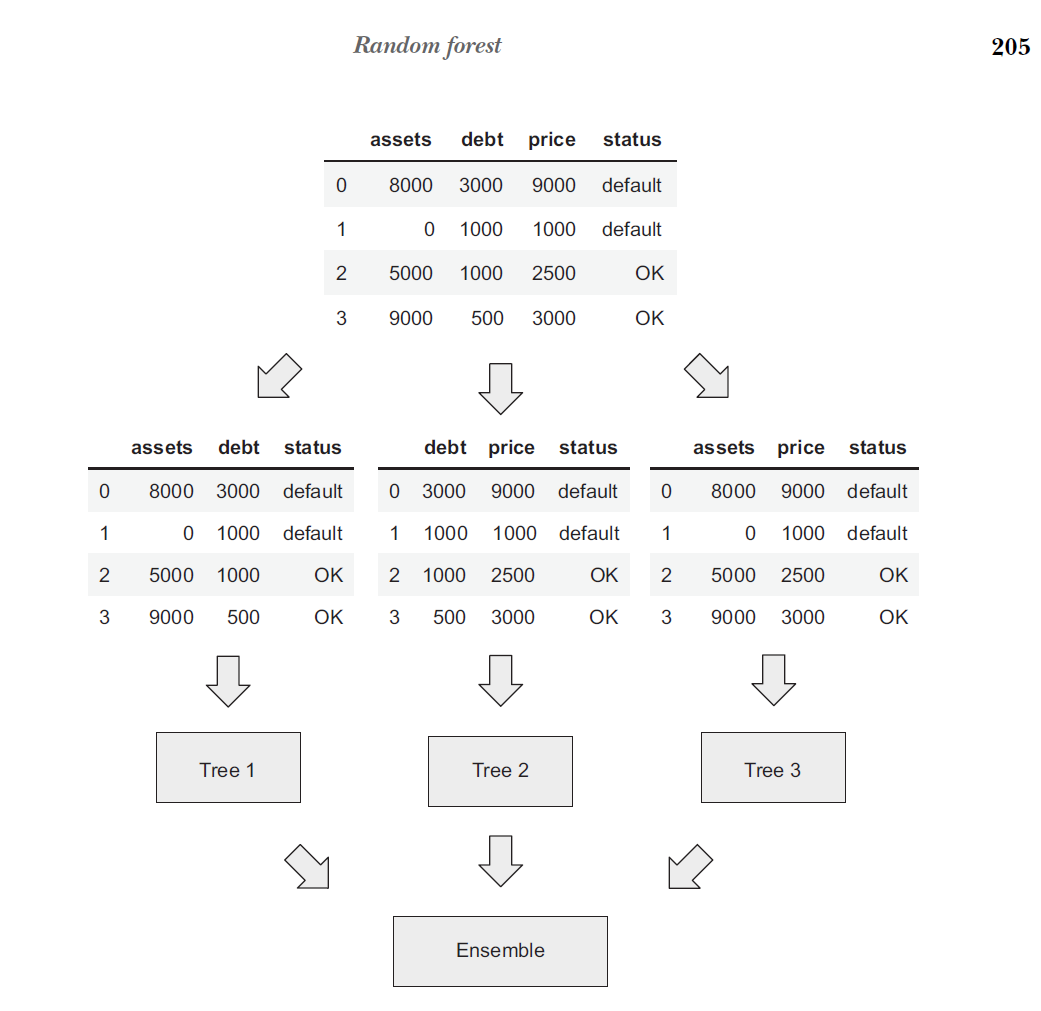


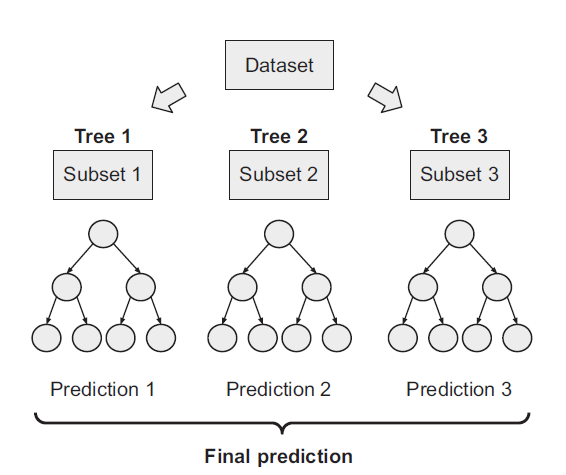

In [372]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [376]:
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.774472645370662

In [383]:
from tqdm.auto import tqdm

In [389]:
# Running this check on a list of estimators
scores = []
for n in tqdm(range(10,201,10)):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))

  0%|          | 0/20 [00:00<?, ?it/s]

In [391]:
df_scores = pd.DataFrame(scores,columns=['n_estimator','auc'])
df_scores

,n_estimator,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


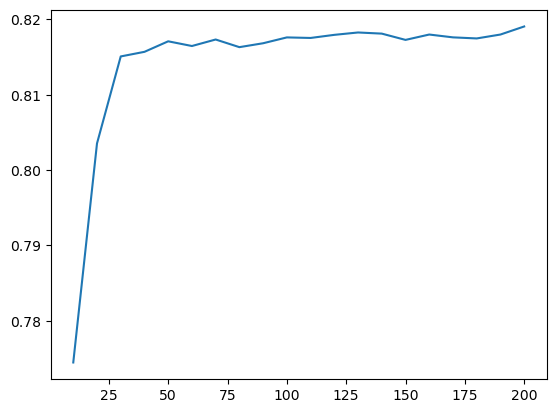

In [393]:
plt.plot(df_scores.n_estimator,df_scores.auc)

Tuning based on max depth

In [396]:
depths = [5,10,15,20]

In [426]:
rf_scores = []
for d in depths:
    for n in tqdm(range(10,201,10)):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        rf_scores.append((d,n,auc))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [434]:
df_rf_scores = pd.DataFrame(rf_scores,columns=['max_depth','n_estimators','auc'])
df_rf_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


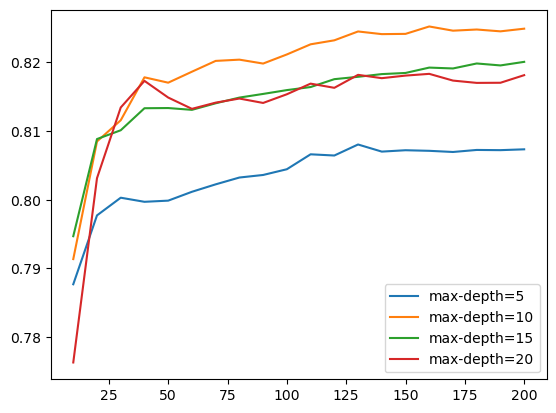

In [441]:
for d in [5,10,15,20]:
    df_sub = df_rf_scores[df_rf_scores.max_depth == d]
    plt.plot(df_sub.n_estimators,
             df_sub.auc,
             label = 'max-depth=%d' % d
            )
plt.legend()

Supposing I take a max-depth of 10

In [443]:
max_depth=10

In [455]:
#How about we tune min-sample_leafs

sample_leaf = [1,3,5,10,50]
rf_scores_list = []

for s in sample_leaf:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        rf_scores_list.append((n,s,auc))

In [456]:
df_rf_scores = pd.DataFrame(rf_scores_list, columns=['estimators','min_samples_leaf','auc'])

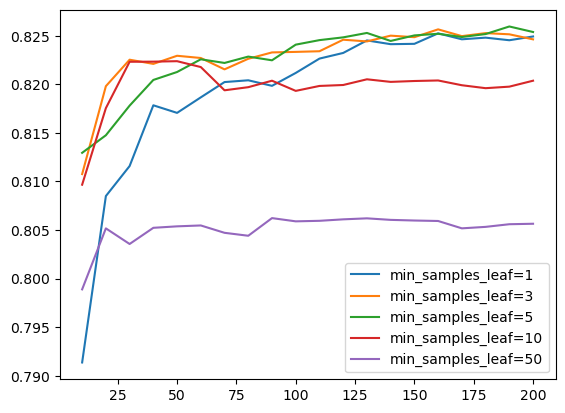

In [463]:
for s in sample_leaf:
    df_sub = df_rf_scores[df_rf_scores.min_samples_leaf == s]
    plt.plot(df_sub.estimators,
             df_sub.auc,
             label = 'min_samples_leaf=%d' % s
            )
plt.legend()

In [465]:
min_sample_leaf = 3

In [469]:
rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=min_sample_leaf,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other usefule features
- max_features
- bootstrap

## 6.7 Gradient Boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing XGBoost's monitoring output


## 6.8 XGBoost Parameter Tuning
- Tuning the following parameters:
  - `eta`
  - `max_depth`
  - `min_child_weight`


## 6.9 Selecting the Final Model
- Choosing between XGBoost, Random Forest, and Decision Tree
- Training the final model
- Saving the model


## 6.10 Summary
- **Decision Trees** learn if-then-else rules from data.
  - Finding the best split: selects the least impure split. This algorithm can overfit, which is controlled by limiting the max depth and the size of the groups.
- **Random Forest** combines multiple decision trees to make predictions. A diverse set of models is needed for accurate predictions.
- **Gradient Boosting** trains models sequentially, with each model attempting to correct the errors of the previous one. **XGBoost** is an optimized implementation of gradient boosting.

## 6.11 Explore More
- **EDA and Feature Engineering**: For this dataset, we skipped Exploratory Data Analysis (EDA) and feature engineering, which could provide additional insights.
- **Random Forest Tuning**: Beyond the basic parameters, consider tuning `max_features` and `bootstrap`.
- **Extra Trees**: This "extremely randomized trees" approach selects a few thresholds randomly instead of the best one, which prevents overfitting. It is implemented in Scikit-Learn as `ExtraTreesClassifier`. Try it in this project.
- **Handling NAs in XGBoost**: XGBoost can handle missing values (`NAs`) directly. Test if skipping `fillna` improves performance.
- **Additional XGBoost Parameters**: Experiment with `subsample` and `colsample_bytree` to fine-tune the model.
- **Feature Importance**: Decision trees can identify important features during training. See examples for `RandomForest` (also applicable to plain decision trees) and `XGBoost` for insights into feature importance.
- **Regression with Trees**: Decision trees are also used for regression problems. Check out `DecisionTreeRegressor`, `RandomForestRegressor`, and the `objective=reg:squarederror` parameter for XGBoost.

